Finding departure temperature...

Departure temperature: T = 0.0206 MeV


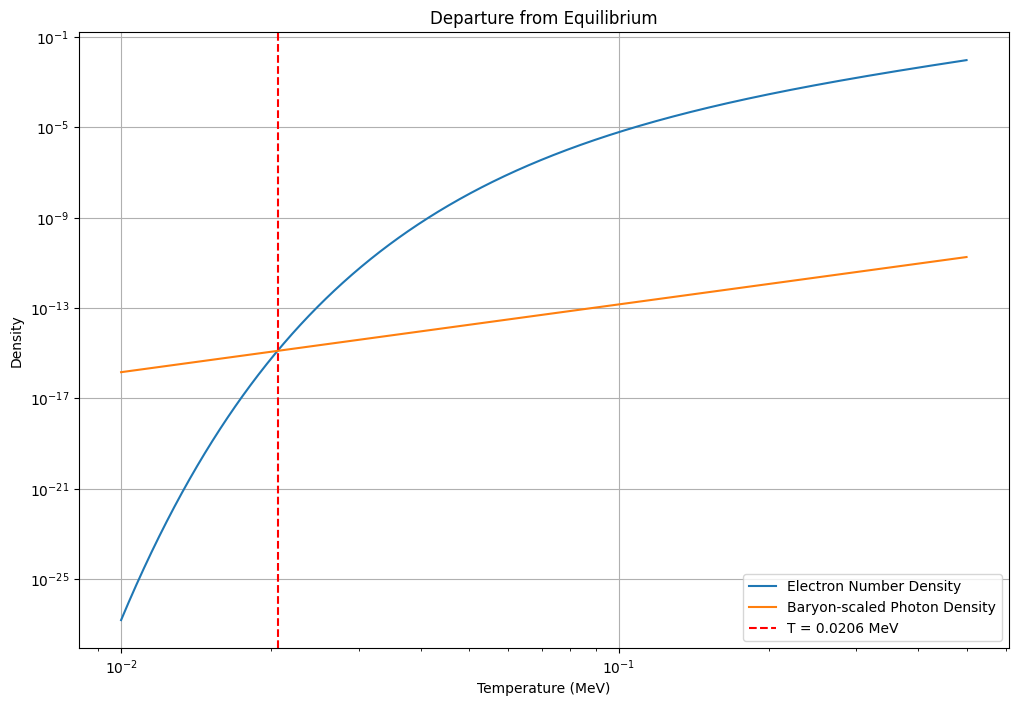

In [34]:
import numpy as np
from scipy import integrate
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# Constants
m_e = 0.511  # Electron mass in MeV
eta_b = 6e-10  # Baryon-to-photon ratio

def integrand_number_density(p, T, m=m_e):
    """Integrand for electron number density."""
    return p**2 / (np.exp(np.sqrt(m**2 + p**2) / T) + 1)

def photon_number_density(T):
    """Analytical photon number density."""
    return (2 * 1.20205 / np.pi**2) * T**3

def electron_number_density(T):
    """Compute the numerical integral for the electron number density."""
    upper_limit = 100 * T  # Adaptive upper limit based on temperature
    integral, _ = integrate.quad(
        integrand_number_density, 
        0, 
        upper_limit, 
        args=(T,),
        limit=10000
    )
    return integral / (2 * np.pi**2)  # Normalize by phase-space factor

def objective_function(T):
    """
    Function to minimize: absolute difference between electron number density
    and baryon-scaled photon number density.
    """
    n_e = electron_number_density(T)
    n_baryon_scaled = eta_b * photon_number_density(T)
    return abs(n_e - n_baryon_scaled)

def find_departure_temperature(T_min=0.01, T_max=1.0):
    """
    Finds the temperature where the electron number density departs from equilibrium
    due to baryon-photon ratio constraint.
    """
    result = minimize_scalar(
        objective_function,
        bounds=(T_min, T_max),
        method='bounded'
    )
    if not result.success:
        raise ValueError("Optimization failed to converge.")
    return result.x

def plot_results(T_departure, T_range):
    """
    Plots the electron number density and baryon-scaled photon number density
    as functions of temperature.
    """
    temperatures = np.geomspace(T_range[0], T_range[1], 1000)
    electron_densities = []
    baryon_scaled_densities = []
    
    for T in temperatures:
        electron_densities.append(electron_number_density(T))
        baryon_scaled_densities.append(eta_b * photon_number_density(T))
    
    plt.figure(figsize=(12, 8))
    plt.plot(temperatures, electron_densities, label='Electron Number Density')
    plt.plot(temperatures, baryon_scaled_densities, label='Baryon-scaled Photon Density')
    plt.axvline(x=T_departure, color='r', linestyle='--', 
                label=f'T = {T_departure:.4f} MeV')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Density')
    plt.title('Departure from Equilibrium')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    T_range = (0.01, 0.5)  # Temperature range in MeV
    print("Finding departure temperature...\n")
    T_departure = find_departure_temperature(T_range[0], T_range[1])
    print(f"Departure temperature: T = {T_departure:.4f} MeV")
    plot_results(T_departure, T_range)
